# Model Training and Evaluation Report

## Introduction
This report is a summary of the model training and evaluation process for the `model.py` script.\
The script is used to train a some basic models to predict the churn of customers in a Bank Company.
## Setup
Import necessary libraries and modules.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# data lib
from data.data_scripts.data_preprocessing import *

# model lib
from evaluations.evaluate import get_best_model
from models.model_scripts.train import train
from models.models import *



## Data Loading
Load the dataset and display the first few rows to understand its structure.


In [2]:

data = load_data("../data/raw_data/data.csv")
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998



## Data Preprocessing
In this section, we preprocess the data to make it ready for training. as I used 3 types of preprocessing techniques:
- **One Hot Encoding**:

    where I convert the categorical data into numerical data by creating a new column for each category and assign 1 or 0 to the column based on the presence of the category in the row.
    we can't use the one hot encoding on the 'Attrition_Flag' column because it's the target column.
    - Categolical data: 
        - Income_Category
        - Education_Level
        - Marital_Status
        - Card_Category
        - Gender
        
- **Ordinal Encoding**:

    where I convert the categorical data into numerical data by assigning a unique number to each category.

    - Categolical data: 
        - Attrition_Flag
        - Income_Category
        - Education_Level
        - Marital_Status
        - Card_Category
        - Gender
        

- **Diff Encoding**:

    In this type of pre processing I tried to separate the data into two parts, the first part is
    - the data that is based on the order of the data like:
        - Attrition_Flag
        - Education_Level
        - Income_Category
        
    and the second part is 
    - the data that is not based on the order of the data like:
        - Marital_Status 
        - Card_Category
        - Gender



### Categorical Data Preprocessing
- Ordinal Encoding

In [3]:
data_ordinal = pre_processing_categorical_ordinal(data)
data_ordinal.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,1,45,M,3,3,Married,2,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,1,49,F,5,2,Single,4,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,1,51,M,3,2,Married,3,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,1,40,F,4,3,Unknown,4,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,1,40,M,3,5,Married,2,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


- One-Hot Encoding


In [4]:
data_onehot = pre_processing_categorical_onehot(data)
data_onehot.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Dependent_count,Education_Level,Income_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,...,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver,Gender_F,Gender_M
0,768805383,1,45,3,3,2,39,5,1,3,...,False,True,False,False,True,False,False,False,False,True
1,818770008,1,49,5,2,4,44,6,1,2,...,False,False,True,False,True,False,False,False,True,False
2,713982108,1,51,3,2,3,36,4,1,0,...,False,True,False,False,True,False,False,False,False,True
3,769911858,1,40,4,3,4,34,3,4,1,...,False,False,False,True,True,False,False,False,True,False
4,709106358,1,40,3,5,2,21,5,1,0,...,False,True,False,False,True,False,False,False,False,True


### Combining All Preprocessing
- All Ordinal


In [5]:
data_all_ordinal = pre_processing_categorical_all_ordinal(data)
data_all_ordinal.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,1,45,1,3,3,1,2,0,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,1,49,0,5,2,2,4,0,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,1,51,1,3,2,1,3,0,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,1,40,0,4,3,3,4,0,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,1,40,1,3,5,1,2,0,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


- All One-Hot


In [6]:
data_all_onehot = pre_processing_categorical_all_onehot(data)
data_all_onehot

,CLIENTNUM,Attrition_Flag,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,...,Marital_Status_0,Marital_Status_1,Marital_Status_2,Marital_Status_3,Card_Category_0,Card_Category_1,Card_Category_2,Card_Category_3,Gender_0,Gender_1
0,768805383,1,45,3,39,5,1,3,12691.0,777,...,False,True,False,False,True,False,False,False,False,True
1,818770008,1,49,5,44,6,1,2,8256.0,864,...,False,False,True,False,True,False,False,False,True,False
2,713982108,1,51,3,36,4,1,0,3418.0,0,...,False,True,False,False,True,False,False,False,False,True
3,769911858,1,40,4,34,3,4,1,3313.0,2517,...,False,False,False,True,True,False,False,False,True,False
4,709106358,1,40,3,21,5,1,0,4716.0,0,...,False,True,False,False,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,1,50,2,40,3,2,3,4003.0,1851,...,False,False,True,False,True,False,False,False,False,True
10123,710638233,0,41,2,25,4,2,3,4277.0,2186,...,True,False,False,False,True,False,False,False,False,True
10124,716506083,0,44,1,36,5,3,4,5409.0,0,...,False,True,False,False,True,False,False,False,True,False
10125,717406983,0,30,2,36,4,3,3,5281.0,0,...,False,False,False,True,True,False,False,False,False,True


## Model Training and Evaluation
Train multiple models with different preprocessing techniques.\
Evaluate the models using various metrics.


In [7]:
evaluations = train("../data/raw_data/data.csv")

/Users/bssayla/Documents/Projects/Level_1/Churn_Prediction/venv/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/bssayla/Documents/Projects/Level_1/Churn_Prediction/venv/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/bssayla/Documents/Projects/Level_1/Churn_Prediction/venv/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [8]:
import json
import numpy as np
def json_serialize(obj):
    if isinstance(obj, np.ndarray):
        return obj.tolist()
    return obj

with open('../evaluations/evaluations.json', 'w') as f:
    json.dump(evaluations, f, default=json_serialize)   


## Compare Models
Compare the performance of the models using various metrics.\
**first we separate the model's metrics into arrays to be able to plot them.**

In [9]:
# get the accuracy of the models
accuracy = []
f1 = []
precision = []
recall = []
roc_auc = []
for pre_processing_type in evaluations:
    for model in evaluations[pre_processing_type]:
        accuracy.append(evaluations[pre_processing_type][model]["accuracy"]*100)
        f1.append(evaluations[pre_processing_type][model]["f1"]*100)
        precision.append(evaluations[pre_processing_type][model]["precision"]*100)
        recall.append(evaluations[pre_processing_type][model]["recall"]*100)
        roc_auc.append(evaluations[pre_processing_type][model]["roc_auc"]*100)
accuracy = np.round(np.array(accuracy),2)
f1 = np.round(np.array(f1),2)
precision = np.round(np.array(precision),2)
recall = np.round(np.array(recall),2)
roc_auc = np.round(np.array(roc_auc),2)

# create a dataframe
data = pd.DataFrame(
    {
        "accuracy": accuracy,
        "f1": f1,
        "precision": precision,
        "recall": recall,
        "roc_auc": roc_auc
    }
)
data.to_csv("../evaluations/evaluations.csv", index=False)


### Accuracy Table
| Model | One hot | Ordinal | Diff |
| --- | --- | --- | --- | 
| 1st | 95.46 | 95.66 | 95.76 |
| 2nd | 95.16 | 95.06 | 95.16 |
| 3rd | 91.12 | 92.50 | 92.05 |



### Precision Table
| Model | One hot | Ordinal | Diff |
| --- | --- | --- | --- | 
| 1st | 95.84 | 96.37 | 96.36 |
| 2nd | 96.41 | 96.46 | 96.41 |
| 3rd | 91.98 | 93.43 | 92.77 |

### recall Table

| Model | One hot | Ordinal | Diff |
| --- | --- | --- | --- | 
| 1st | 98.88 | 98.53 | 98.65 |
| 2nd | 97.88 | 97.70 | 97.88 |
| 3rd | 97.94 | 97.94 | 98.18 |


### F1 Score Table
| Model | One hot | Ordinal | Diff |
| --- | --- | --- | --- |
| 1st | 97.33 | 97.44 | 97.50 |
| 2nd | 97.14 | 97.08 | 97.14 |
| 3rd | 94.87 | 95.63 | 95.40 |


### ROC AUC Table

| Model | One hot | Ordinal | Diff |
| --- | --- | --- | --- |
| 1st | 88.28 | 89.63 | 89.69 |
| 2nd | 89.46 | 89.53 | 89.46 |
| 3rd | 76.80 | 81.08 | 79.21 |


## Plot the Evaluations

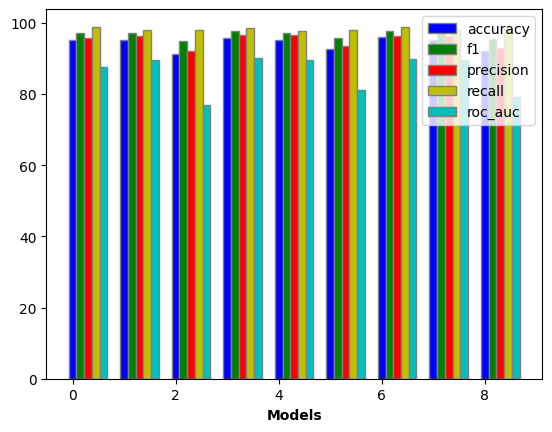

In [10]:
fig, ax = plt.subplots()
barWidth = 0.15
r1 = np.arange(len(accuracy))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]

plt.bar(r1, accuracy, color='b', width=barWidth, edgecolor='grey', label='accuracy')
plt.bar(r2, f1, color='g', width=barWidth, edgecolor='grey', label='f1')
plt.bar(r3, precision, color='r', width=barWidth, edgecolor='grey', label='precision')
plt.bar(r4, recall, color='y', width=barWidth, edgecolor='grey', label='recall')
plt.bar(r5, roc_auc, color='c', width=barWidth, edgecolor='grey', label='roc_auc')

plt.xlabel('Models', fontweight='bold')
plt.legend()
plt.show()

fig.savefig("../evaluations/evaluations.png")



## Best Model Selection
Select the best model based on evaluation metrics.


- The best model based on the accuracy 

In [11]:
# get the best model
best_model = get_best_model(evaluations, "accuracy")
best_model


('DIFF', 'first_model', 0.9595261599210266)

- The best model based on the f1 score

In [12]:
# get the best model
best_model = get_best_model(evaluations, "f1")
best_model


('DIFF', 'first_model', np.float64(0.9761766414875073))

- The best model based on precision

In [13]:
# get the best model
best_model = get_best_model(evaluations, "precision")
best_model


('ORDINAL', 'first_model', np.float64(0.9654178674351584))

- The best model based on recall

In [14]:
# get the best model
best_model = get_best_model(evaluations, "recall")
best_model


('DIFF', 'first_model', np.float64(0.9888169511477339))

- The best model based on roc auc

In [15]:
# get the best model
best_model = get_best_model(evaluations, "roc_auc")
best_model


('ORDINAL', 'first_model', np.float64(0.9011939025114611))

## Conclusion
| Metric | Best pre-Processing |Best Model | Score|
| --- | --- | --- | --- |
| Accuracy | DIFF | first_model | 0.959526159921026 |
| F1_Score | DIFF | first_model | 0.9761766414875073 |
| Precision | ORDINAL | first_model | 0.9654178674351584 |
| Recall | DIFF | first_model | 0.9888169511477339 |
| ROC_AUC | ORDINAL | first_model | 0.9011939025114611 |

At the end, we can conclude that the best model is the first model with the diff pre-processing technique.